# Shortcut connections
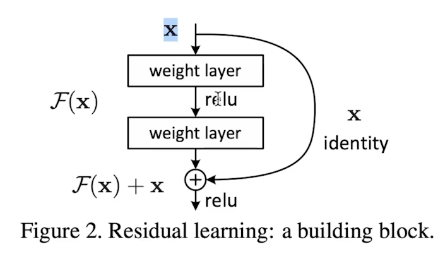

In [202]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [203]:

class ShortcutConnections(nn.Module):
  def __init__(self, embd_dim):
    super().__init__()
    self.layers = nn.ModuleList([
      nn.Sequential( nn.Linear(embd_dim, embd_dim), nn.GELU()),
      nn.Sequential( nn.Linear(embd_dim, embd_dim), nn.GELU()),
      nn.Sequential( nn.Linear(embd_dim, embd_dim), nn.GELU()),
      nn.Sequential( nn.Linear(embd_dim, embd_dim), nn.GELU()),
      nn.Sequential( nn.Linear(embd_dim, 1), nn.GELU()),
    ])

  def forward(self,x):
    for layer in self.layers:
      out = layer(x)
      x = x + out if x.shape == out.shape else out
    return x

def print_gradients(model,x):
  #forward pass
  output = model(x)
  target = torch.tensor([[0.]])

  #loss function
  loss = nn.MSELoss()
  loss = loss(output,target)

  #Backward pass
  loss.backward()

  for name,params in model.named_parameters():
    print(f"{name=} \n{params.grad.abs().mean().item()=}") if "weight" in name else print("---")

In [204]:
torch.manual_seed(123)
sc = ShortcutConnections(3)
x = torch.tensor([[1.,0,-1.]])

print_gradients(sc,x)

name='layers.0.0.weight' 
params.grad.abs().mean().item()=0.22186800837516785
---
name='layers.1.0.weight' 
params.grad.abs().mean().item()=0.20709273219108582
---
name='layers.2.0.weight' 
params.grad.abs().mean().item()=0.3292388319969177
---
name='layers.3.0.weight' 
params.grad.abs().mean().item()=0.2667772173881531
---
name='layers.4.0.weight' 
params.grad.abs().mean().item()=1.3268063068389893
---
